## Calcular Distancias de Escuelas a establecimientos que venden alcohol mas cercanos

# Chequen los PATHS 

Primero se importan los scripts y scipy

In [1]:
from scripts.filter import filtrar_dataframe
from scripts.distance import find_nearest
from scipy.spatial import KDTree
import pandas as pd


# Seccion de PATHS

In [2]:
# Lista de rutas de archivos Negocios DENUE
paths_negocios_denue = [
    # AQUI AGREGUEN LOS PATHS DE SUS CSVs
    '/home/jay/repos/AI/feminicidios/denue_00_46111_csv/conjunto_de_datos/denue_inegi_46111_.csv',
    '/home/jay/repos/AI/feminicidios/denue_00_46112-46311_csv/conjunto_de_datos/denue_inegi_46112-46311_.csv',
    '/home/jay/repos/AI/feminicidios/denue_00_46321-46531_csv/conjunto_de_datos/denue_inegi_46321-46531_.csv',
    '/home/jay/repos/AI/feminicidios/denue_00_46591-46911_csv/conjunto_de_datos/denue_inegi_46591-46911_.csv',
    
    # Sin querer puse el PATH de las escuelas, xd que bueno que despues de get_alcohol() el DF estaba vacio
    # Lo deje para debuggear
    # '/home/jay/repos/AI/feminicidios/denue_00_61_csv/conjunto_de_datos/denue_inegi_61_.csv'
]

# Ruta de archivo Escuelas DENUE
file_path_escuelas = '/home/jay/repos/AI/feminicidios/denue_00_61_csv/conjunto_de_datos/denue_inegi_61_.csv'

# Ruta de archivo salud DENUE
file_path_salud = '/home/jay/repos/GeoStats/denue/denue_00_62_csv/conjunto_de_datos/denue_inegi_62_.csv'

# Ruta de archivo parques DENUE
file_path_parques = '/home/jay/repos/GeoStats/denue/denue_00_71_csv/conjunto_de_datos/denue_inegi_71_.csv'

# Ruta de archivo mayoreo DENUE
file_path_mayoreo = '/home/jay/repos/GeoStats/denue/denue_00_43_csv/conjunto_de_datos/denue_inegi_43_.csv'

## Dado una lista de terminos en una lista de columnas se filtra.

In [3]:
columnas_para_filtrar = ['nombre_act', 'raz_social', 'nom_estab']

In [4]:
# Filtramos escuelas 
df_escuelas = filtrar_dataframe(file_path_escuelas, columnas_para_filtrar, [])

In [5]:
# Filtramos parques
terminos_parques = ['parques', 'jardin', 'plaza', 'bosque']
df_parques = filtrar_dataframe(file_path_parques, columnas_para_filtrar, terminos_parques)

In [6]:
# Salud es complicado, porque queremos hospitales, publicas y privadas separadas
terminos_privadas = ['consultorio', 'privado']
terminos_publicas = ['imss', 'publico', 'isste']
terminos_hospitales = ['hospital', 'cirugia']

df_salud_privadas = filtrar_dataframe(file_path_salud, columnas_para_filtrar, terminos_privadas)
df_salud_publicas = filtrar_dataframe(file_path_salud, columnas_para_filtrar, terminos_publicas)
df_salud_hospitales = filtrar_dataframe(file_path_salud, columnas_para_filtrar, terminos_hospitales)

In [7]:
# Para los negocios de alcohol tenemos que unir todos los dataframes al final
terminos_alcohol = ['alcohol', 'licor', 'cerveza', 'bar', 'cantina', 'vinos', 'bebidas alcoholicas']

df_alcohol_list = []

for path in paths_negocios_denue:
    df_filtrado = filtrar_dataframe(path, columnas_para_filtrar, terminos_alcohol)
    df_alcohol_list.append(df_filtrado)

df_alcohol = pd.concat(df_alcohol_list, ignore_index=True)

    

In [8]:
# Fabricas
terminos_fabricas = ['fabrica', 'fabricacion', 'industria', 'industrias', 'industrial', 'industriales']
df_fabricas = filtrar_dataframe(file_path_mayoreo, columnas_para_filtrar, terminos_fabricas)

# EDA

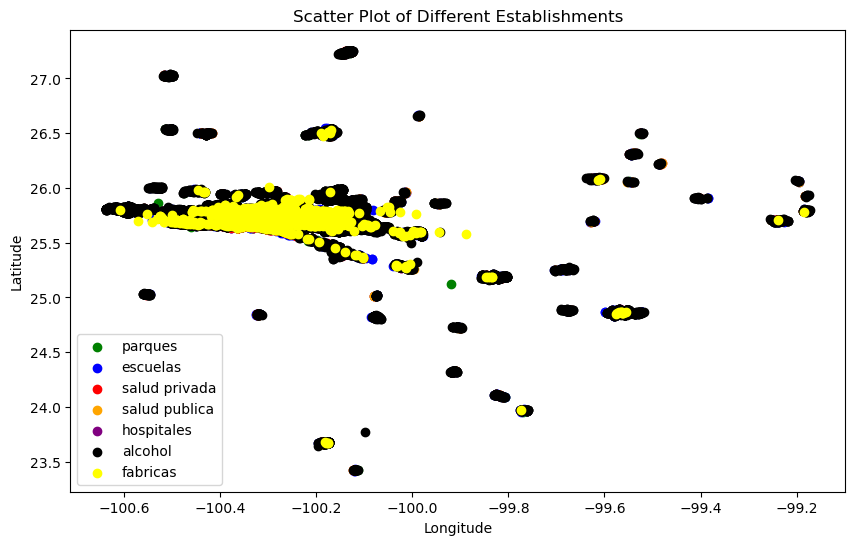

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot each dataframe with a different color
plt.scatter(df_parques['longitud'], df_parques['latitud'], color='green', label='parques')
plt.scatter(df_escuelas['longitud'], df_escuelas['latitud'], color='blue', label='escuelas')
plt.scatter(df_salud_privadas['longitud'], df_salud_privadas['latitud'], color='red', label='salud privada')
plt.scatter(df_salud_publicas['longitud'], df_salud_publicas['latitud'], color='orange', label='salud publica')
plt.scatter(df_salud_hospitales['longitud'], df_salud_hospitales['latitud'], color='purple', label='hospitales')
plt.scatter(df_alcohol['longitud'], df_alcohol['latitud'], color='black', label='alcohol')
plt.scatter(df_fabricas['longitud'], df_fabricas['latitud'], color='yellow', label='fabricas')

# Add a title and labels
plt.title('Scatter Plot of Different Establishments')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add a legend to identify the datasets
plt.legend()

# Show the plot
plt.show()

# Menor distancia entre dos dataframes
## Se usa sklearn para el compute
## Se guarda el indice y la distancia del establecimiento mas cercano a la escuela

In [10]:
# SKLearn, se tarda ~2min
distances, indices = find_nearest(df_escuelas, df_alcohol)

# Agregamos al DF
df_escuelas['closest_distance_km'] = distances[:, 0]
df_escuelas['closest_alcohol_id'] = df_alcohol.iloc[indices[:, 0]]['id'].values

In [11]:
df_escuelas.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,closest_distance_km,closest_alcohol_id
88883,2928650,19021611112000352000000000U4,13 septiembre turno vespertino,secretaria de educacion publica,611112,escuelas de educacion preescolar del sector pu...,6 a 10 personas,CALLE,CERRO DEL MIRADOR,CALLE,...,48,8.183974e+09,NaN,NaN,Fijo,25.795491,-100.294070,2010-07,0.013171,7333813
88884,3007400,19048611122000433000000000U4,15 de septiembre turno matutino,secretaria de educacion,611122,escuelas de educacion primaria del sector publico,11 a 30 personas,CALLE,CAÑON DEL COLORADO,CALLE,...,34,8.183169e+09,ESCUELAPRIMARIAQUINCEDESEPTIEMBRE@HOTMAIL.COM,NaN,Fijo,25.681459,-100.495767,2010-07,0.027260,3007403
88885,8745473,19039611122003993000000000U3,1979 ano internacional del nino turno matutino,escuela primaria ano internacional del nino tu...,611122,escuelas de educacion primaria del sector publico,11 a 30 personas,CALLE,SANTA ROSA,CALLE,...,1,NaN,ESCUELA1979@LIVE.COM,NaN,Fijo,25.737419,-100.340182,2019-11,0.028834,2936596
88886,2940661,19045611132000074000000000U2,1983 cincuentario de la educacion secundaria,1983 cincuentenario de la educacion secundario,611132,escuelas de educacion secundaria general del s...,11 a 30 personas,CALZADA,CALZADA DEL SOL,CALLE,...,18,NaN,SECUNTARIATV5@OULOK.COM,NaN,Fijo,25.915361,-100.263047,2014-12,0.148256,2925886
88887,8816777,19017611312000021000000000U9,19b subcede universidad pedagogica nacional upn,secretaria de educacion publica,611312,escuelas de educacion superior del sector publico,0 a 5 personas,CALLE,15 DE MAYO,CALLE,...,5,NaN,NaN,NaN,Fijo,24.826925,-100.075245,2019-11,0.148309,3051555
